In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the dataset from CSV
df = pd.read_csv(r"wavelet_Bhawanipatna.csv")

# Separate the features from the target variable (if applicable)
X = df.drop('spi', axis=1)  # Replace 'target_variable' with the actual column name

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to retain
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
desired_variance = 0.95  # Retain 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# Select the desired number of components
selected_components = X_pca[:, :num_components]

# Optional: Perform further analysis on the selected components
# e.g., clustering, classification, regression


In [2]:
selected_components

array([[ 1.82523906,  2.47749461,  0.094107  , ...,  0.27660994,
         0.70404947, -0.73399673],
       [ 1.65799965,  2.63388836,  0.12285837, ...,  0.22910011,
         0.50145859, -0.69334695],
       [ 0.92065962,  2.82662566,  0.15187959, ...,  0.25159176,
         0.29463315, -0.5271094 ],
       ...,
       [-0.22100831,  2.01984666, -0.36224424, ...,  0.17076558,
         0.40677467, -0.59910168],
       [ 0.7863416 ,  2.13920425, -0.14937386, ...,  0.23078888,
         0.64571111, -0.63398362],
       [ 1.49074715,  2.3567322 , -0.55324909, ...,  0.2715737 ,
         0.74653894, -0.84163697]])

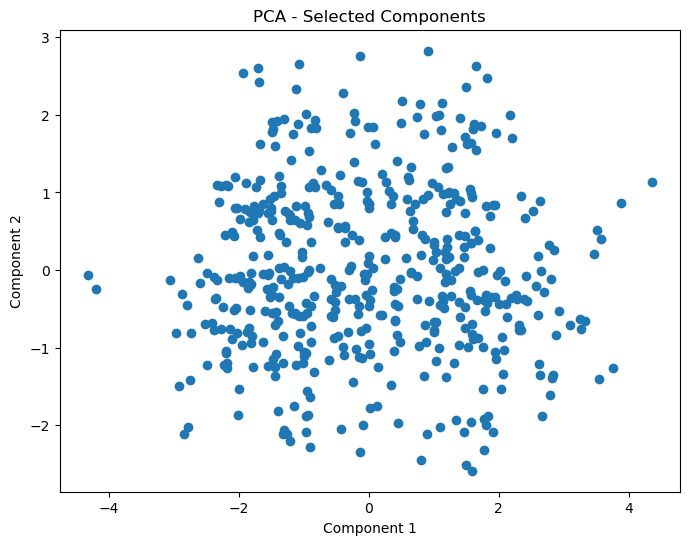

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Read the dataset from CSV
df = pd.read_csv(r"wavelet_Bhawanipatna.csv")

# Separate the features from the target variable (if applicable)
X = df.drop('spi', axis=1)  # Replace 'target_variable' with the actual column name
y = df['spi']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to retain
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
desired_variance = 0.95  # Retain 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# Select the desired number of components
selected_components = X_pca[:, :num_components]

# Plot the selected components
plt.figure(figsize=(8, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1])  # Plotting the first two components
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA - Selected Components')
plt.show()




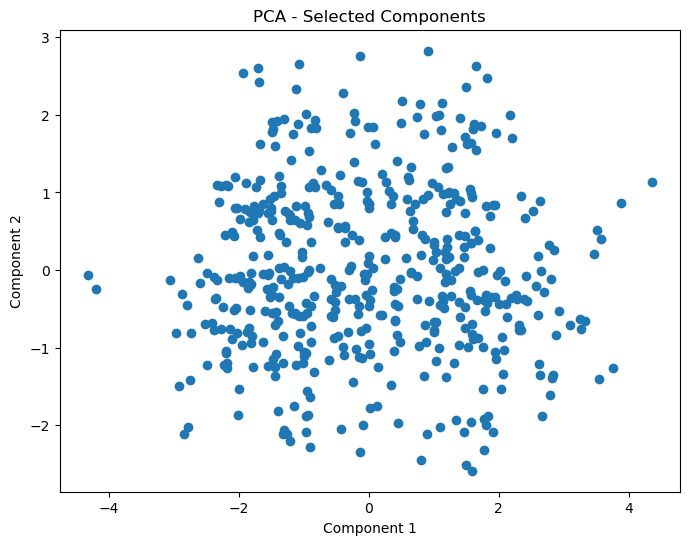

Mean Squared Error: 0.46


C:\Users\asitg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
# Read the dataset from CSV
df = pd.read_csv(r"wavelet_Bhawanipatna.csv")

# Separate the features from the target variable (if applicable)
X = df.drop('spi', axis=1)  # Replace 'target_variable' with the actual column name
y = df['spi']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to retain
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
desired_variance = 0.95  # Retain 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# Select the desired number of components
selected_components = X_pca[:, :num_components]

# Plot the selected components
plt.figure(figsize=(8, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1])  # Plotting the first two components
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA - Selected Components')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_components, y, test_size=0.3, random_state=42)

# Create and train the ELM regression model using scikit-learn's MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(250,), activation='relu', random_state=32)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('wavelet_Bhawanipatna.csv')

# Separate the features and target variable
X = data.iloc[:, 1:].values
y = data['spi'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain 95% of the variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Select the top 'num_components' principal components
selected_features = X_pca[:, :num_components]

# Print the selected features
print("Selected features:")
print(selected_features)

# You can now use the selected features for further analysis or modeling


Selected features:
[[ 1.82523906  2.47749461  0.094107   ...  0.27660994  0.70404947
  -0.73399673]
 [ 1.65799965  2.63388836  0.12285837 ...  0.22910011  0.50145859
  -0.69334695]
 [ 0.92065962  2.82662566  0.15187959 ...  0.25159176  0.29463315
  -0.5271094 ]
 ...
 [-0.22100831  2.01984666 -0.36224424 ...  0.17076558  0.40677467
  -0.59910168]
 [ 0.7863416   2.13920425 -0.14937386 ...  0.23078888  0.64571111
  -0.63398362]
 [ 1.49074715  2.3567322  -0.55324909 ...  0.2715737   0.74653894
  -0.84163697]]
